# Ball movement in a 2D space
In this project, we will set N balls in a 2D space, and calculate the new positions periodically. All collision will be considered a ellastic collision.

First let us import all related python packages

In [6]:
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib nbagg

print("This is a Jupyter notebook.")

This is a Jupyter notebook.


## Define the ball class and other functions
Now, we are going to set the ball class. 
### definition
In the constractor definition, we defined five properties of a ball position(x,y), size(r), and velocities(vx,by). We defined a count variable to track the number of balls in the system.
### functions
show() function shows all properties of a single ball.<br>
plot() function plots a single ball<br>
updateposition() function update balls position and velocities after a collision with the boundaries.

In [7]:
# Define the ball class with all its functions
class ball:
    'Ball class, store ball position and velocities'
    count=0
    
    def __init__(self,**arg):
        if 'x' in arg.keys():
            self.x=arg['x'];
        else:
            self.x=rnd.randrange(0,100,1);
        
        if 'y' in arg.keys():    
            self.y=arg['y'];
        else:
            self.y=rnd.randrange(0,100,1);

        if 'r' in arg.keys():    
            self.r=arg['r'];
        else:
            self.r=1;
         
        if 'vx' in arg.keys():        
            self.vx=arg['vx'];
        else:
            self.vx=rnd.randrange(-10,10,1);
        
        if 'vy' in arg.keys():
            self.vy=arg['vy'];
        else:
            self.vy=rnd.randrange(-10,10,1);
        
        ball.count+=1;
     
     
    def show(self):
        print ("x,y,vx,vy: ",self.x,self.y,self.vx,self.vy)
    
    def plot(self):
        plt.scatter(self.x,self.y)
        plt.show()
    def updatePosition(self,t,L):
        xmin,xmax,ymin,ymax=L;
        xnew=self.x+self.vx*t;
        ynew=self.y+self.vy*t;

        if xnew>xmax: xnew=2*xmax-xnew;self.vx=-self.vx;
        if xnew<xmin: xnew=2*xmin-xnew;self.vx=-self.vx;
        if ynew>ymax: ynew=2*ymax-ynew;self.vy=-self.vy;
        if ynew<ymin: ynew=2*ymin-ynew;self.vy=-self.vy;

        self.x=xnew;
        self.y=ynew;
        return
########### End of classes #################### 

### supporting functions
Now we defined two more supporting functions.<br>
The checkCollision(a,b) function check if ball a and b collide or not. <br>
The collisionUpdate(a,b) function update the velocities of balls a and b after a collision.

In [8]:
def checkCollision(a,b):
    return pow(pow(a.x-b.x,2)+pow(a.y-b.y,2),0.5)<(a.r+b.r)

def collisionUpdate(a,b):
    c=((a.vx-b.vx)*(a.x-b.x)+(a.vy-b.vy)*(a.y-b.y))/(pow(a.x-b.x,2)+pow(a.y-b.y,2));
    a.vx=a.vx-c*(a.x-b.x);
    a.vy=a.vy-c*(a.y-b.y);

    b.vx=b.vx+c*(a.x-b.x);
    b.vy=b.vy+c*(a.y-b.y);
    return a,b;                      
########### End of functions ####################

## The main function
In the main function, we defined 50 balls in random position, calculate balls position for 500 cycle, and update time is 0.1 second. plt.hold() is not supported in the jupyter notebook. Therefore, I commented that line. 

<IPython.core.display.Javascript object>


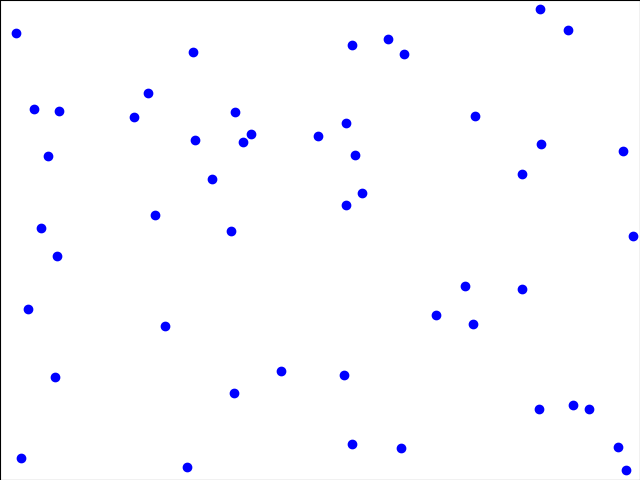

In [9]:
N=50
b=[ball() for k in range(0,N)]
t=0.1
boundary=(0,100,0,100)
CYCLE=500;
ims=[]

# set initial figure 
fig=plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlim(-1, 101)
ax.set_ylim(-1, 101)


for cycle in range(0,CYCLE):
    for m in range(0,N-1):
        for n in range(m+1,N):
            collision=checkCollision(b[m],b[n])
            
            if collision:
                b[m],b[n]=collisionUpdate(b[m],b[n])
                continue
    
    for k in range(0,N):
        b[k].updatePosition(t,boundary);
    
    data=np.zeros((N,2))            
    for k in range(0,N):
        data[k,]=b[k].x,b[k].y
    
    
    im=ax.scatter(data[:,0],data[:,1],animated=True,color='blue')
    ims.append([im])
    
    

In [10]:
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=100)

HTML(ani.to_html5_video())


%%HTML
<video width="480" height="360" controls>
  <source src="https://drive.google.com/open?id=0ByHnCdqWuIj5TDRNaWRtVHdJVzA" type="video/mp4">
</video>


(Download the .mp4 file from the Ball-Movement-in-2D folder if no animation is embeded in your browser)<br>
Thank you!